<a href="https://colab.research.google.com/github/JuanPedroDelCastillo/FisicaComputacional1/blob/master/Actividad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 10


**Solución Numérica de Ecuaciones Diferenciales Parciales**

In [1]:
# Importamos Bibliotecas
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Ejercicio 1

**Caso a)** 

Una barra metálica de longitud $L=10$, y coeficiente de difusión $\kappa=10.0$.
Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.

Condiciones a la frontera: u(0,t)=10, u(L,t)=0.

Realice los cálculos hasta alcanzar el equilibrio térmico.




dt/dx**2 < 0.5? 0.0014999999999999996


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: The following kwargs were not used by contour: 'lw'


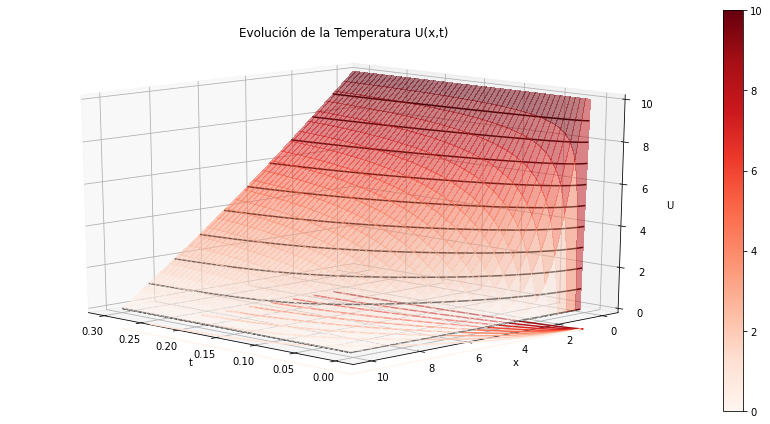

In [11]:
# Definimos los ejes:
x0 = 0
xL = 10

t0 = 0
tF = 0.3

# Discretización de los ejes:
M = 51 # puntos en x
N = 5001 # puntos en t

dx = (xL - x0)/(M-1)
dt = (tF - t0)/(N-1)

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

print('dt/dx**2 < 0.5?', dt/dx**2)

# Constantes
kappa = 100
alpha = kappa * dt / dx**2

# Matriz Solución
U = np.zeros((M, N))

# Condición inicial:
U[:, 0] = 0 

# Condiciones de frontera:
U[0, :] = 10 
U[-1, :] = 0 

# Método de diferencias finitas:

for k in range(0, N-1): # Avance en el tiempo
  for j in range(1, M-1): # Avance en la distancia
    U[j, k+1] = alpha * U[j-1, k] + (1 - 2*alpha) * U[j, k] + alpha * U[j+1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U , cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t)')

# Punto del observador 
ax.view_init(elev=15, azim=135)

plt.tight_layout()
plt.show()

**Caso b)** 

Un material de longitud $L=10$ con coeficiente de difusión térmica $\kappa=0.25$

Condición inicial u(x,0)=20.

Condiciones a la frontera: u(0,t)=(20 + 10 sin(pi*t/12), u(L,t)=20.

Realice los cálculos para t=(0,48)

Pueden ajustar los parámetros para ver cómo cambia la temperatura dentro del cuerpo.

dt/dx**2 < 0.5? 0.11999999999999997


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: The following kwargs were not used by contour: 'lw'


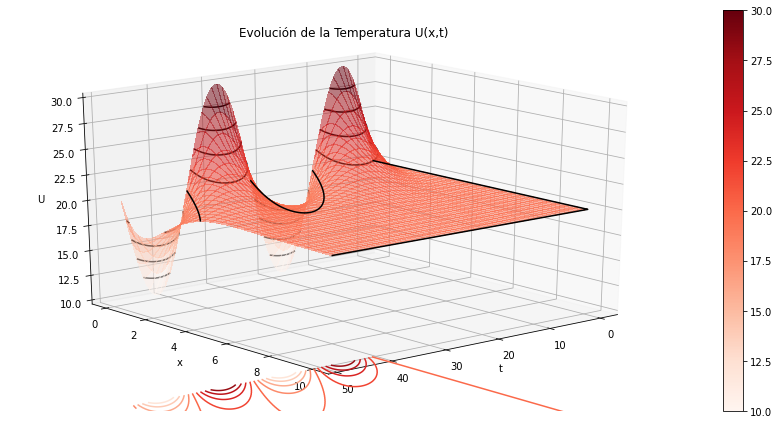

In [12]:
# Definimos los ejes:
x0 = 0
xL = 10

t0 = 0
tF = 48

# Discretización de los ejes:
M = 51 # puntos en x
N = 10001 # puntos en t

dx = (xL - x0)/(M-1)
dt = (tF - t0)/(N-1)

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

print('dt/dx**2 < 0.5?', dt/dx**2)

# Constantes
kappa = 0.25
alpha = kappa * dt / dx**2

# Matriz Solución
U = np.zeros((M, N))

# Condición inicial:
U[:, 0] = 20 

# Condiciones de frontera:
U[0, :] = 20 + 10*np.sin(np.pi*tspan/12) 
U[-1, :] = 20 

# Método de diferencias finitas:

for k in range(0, N-1): # Avance en el tiempo
  for j in range(1, M-1): # Avance en la distancia
    U[j, k+1] = alpha * U[j-1, k] + (1 - 2*alpha) * U[j, k] + alpha * U[j+1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t)')

# Punto del observador 
ax.view_init(elev=20, azim=50)

plt.tight_layout()
plt.show()

## Ejercicio 2

**Variaciones de la Temperatura en el Suelo**

La superficie de la Tierra recibe radiación solar durante el día. Esta Energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera. 

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje $x$ la dirección hacia dentro del suelo.

A cierta profundidad $x=L$, suponemos que la temperatura ya no cambia, es decir $\partial u/\partial x = 0$ (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre varía como 

\begin{equation*}
u(0,t) = u_0 + u_a \sin (\frac{2\pi t}{P})
\end{equation*}

donde $u_0$ es la inical temperatura promedio del suelo y $u_a$ es la temperatura del aire. La constante $P$ es el periodo de variación diaria de temperatura $P=24 h=86,400 s$.

En este caso la constante de difusión de calor es $\kappa = 1.0 \times 10^{-6}$. El tiempo será medido en segundos. 

Usando la Ecuación de Calor, determina numéricamente  la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que $u_0=15ºC$, $u_a= 20ºC$.

Realiza una simulación de al menos 48 horas. 



dt/dx**2 < 0.5? 23.999999999999996


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: The following kwargs were not used by contour: 'lw'


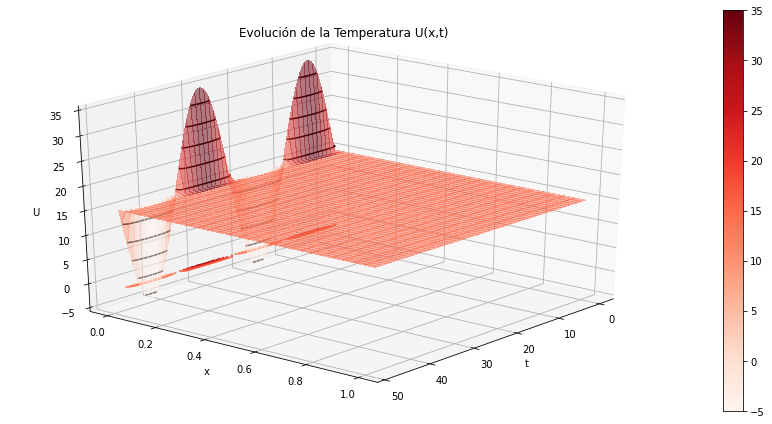

In [24]:
# Definimos los ejes:
x0 = 0
xL = 1 # Supondremos que la distancia es 1 metro

t0 = 0
tF = 48

# Discretización de los ejes:
M = 51 # puntos en x
N = 5001 # puntos en t

dx = (xL - x0)/(M-1)
dt = (tF - t0)/(N-1)

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

print('dt/dx**2 < 0.5?', dt/dx**2)

# Constantes
kappa = 1*10**(-6)
alpha = kappa * dt / dx**2

U0 = 15 
Ua = 20 

P = 24

# Matriz Solución
U = np.zeros((M, N))

# Condición inicial:
U[0, :] = U0 + Ua*np.sin(2*np.pi*tspan / P)


# NOTA: como la derivada es cero en x=L (neumann) entonces la temperatura
# permanece constante con el promedio de u (u0)
# Condiciones de frontera:
U[-1, :] = U0
U[:, 0] = U0

# Método de diferencias finitas:

for k in range(0, N-1): # Avance en el tiempo
  for j in range(1, M-1): # Avance en la distancia
    U[j, k+1] = alpha * U[j-1, k] + (1 - 2*alpha) * U[j, k] + alpha * U[j+1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U , cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U , 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U , 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t)')

# Punto del observador 
ax.view_init(elev=25, azim=40)

plt.tight_layout()
plt.show()